In [1]:
run_folders = [
    'runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud',
    'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud',
    'runs/20240329_204439_CV_3_FINAL_DRGCN_crossval_sl_dir_meanaggr',
    'runs/20240330_145148_CV_3_FINAL_DRGCN_crossval_sl_dir_sumaggr',
    'runs/20240327_085529_CV_2_FINAL_BareboneGCN_crossval_sl_ud',
    'runs/20240327_095847_CV_2_FINAL_BareboneGIN_crossval_sl_ud'
    
]

# inside run folder is all_configs.yml :
import yaml
import os

per_folder = {}
for folder in run_folders:
    # with open('all_configs.yml', 'r') as file:
    #     all_configs = yaml.safe_load(file)
    per_folder[folder] = {}
    for cv in ['cv_0', 'cv_1', 'cv_2','cv_3','cv_4']:
        f1 = os.listdir((folder + '/'+ cv))[0]
        yamlx = folder + '/'+ cv +'/'+f1+ '/models/best_val_metrics.yml'
        data= yaml.safe_load(open(yamlx,'rb'))
        for k,v in data.items():
            if k not in per_folder[folder]:
                per_folder[folder][k] = []
            per_folder[folder][k].append(v)
    
        


In [2]:
# switch folder and k 
new_data = {}
for folder, dx in per_folder.items():
    for k, v in dx.items():
        if k not in new_data:
            new_data[k] = {}
        new_data[k][folder] = v

In [3]:
data.keys()

dict_keys(['FN', 'FP', 'TN', 'TP', 'balanced_accuracy', 'epoch', 'f1', 'loss', 'precision', 'recall'])

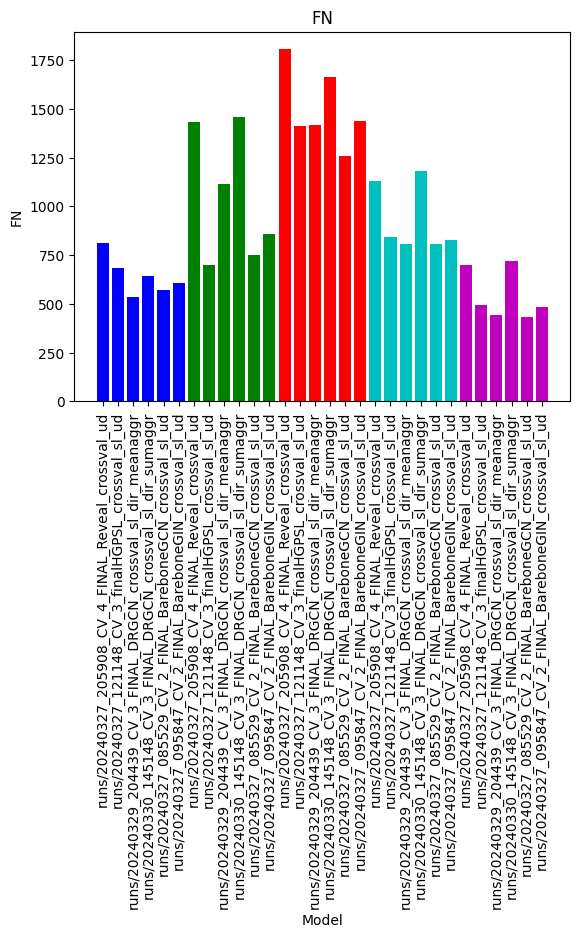

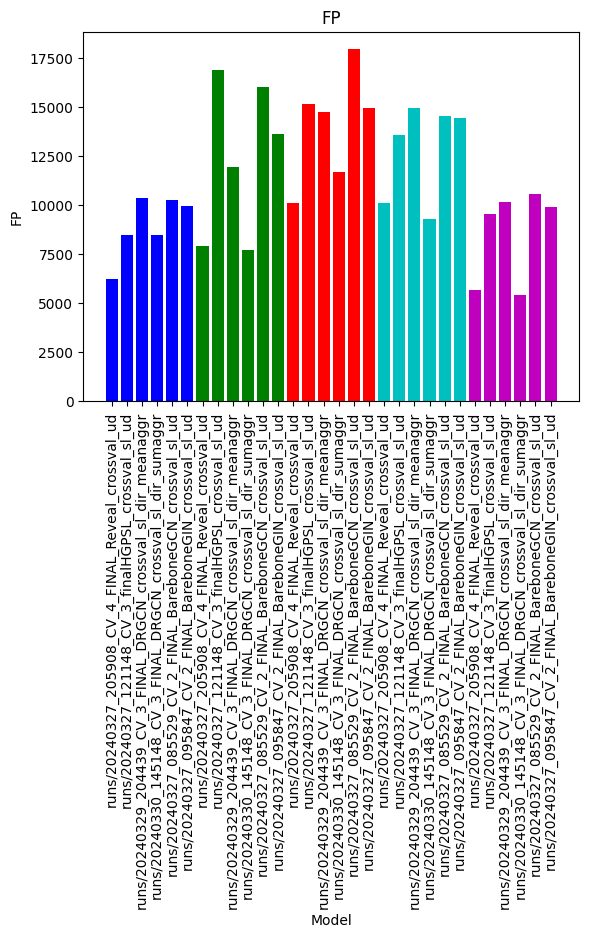

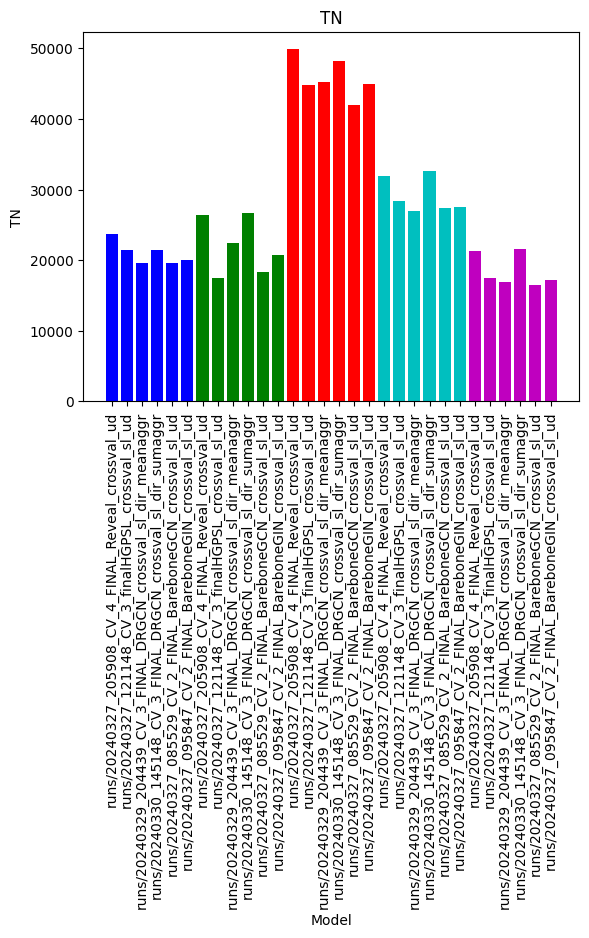

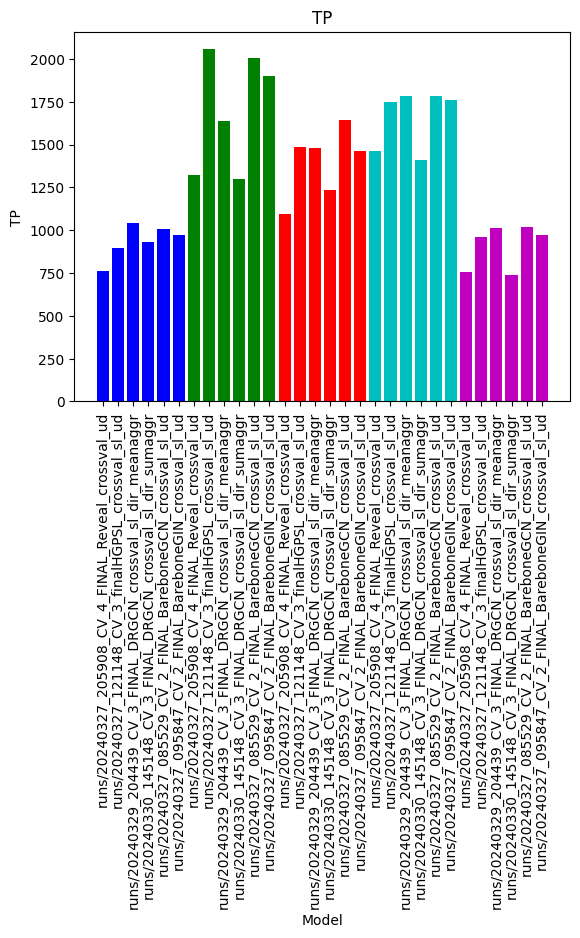

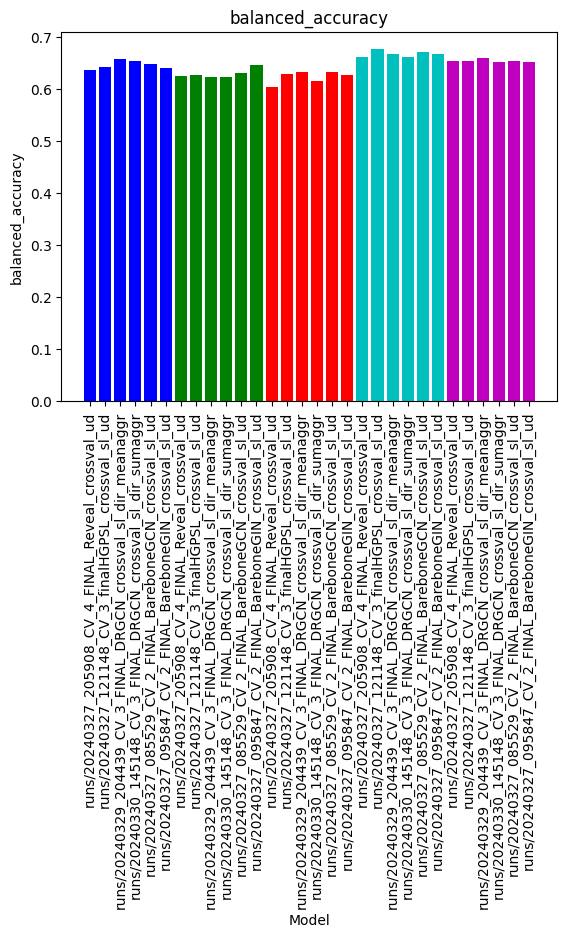

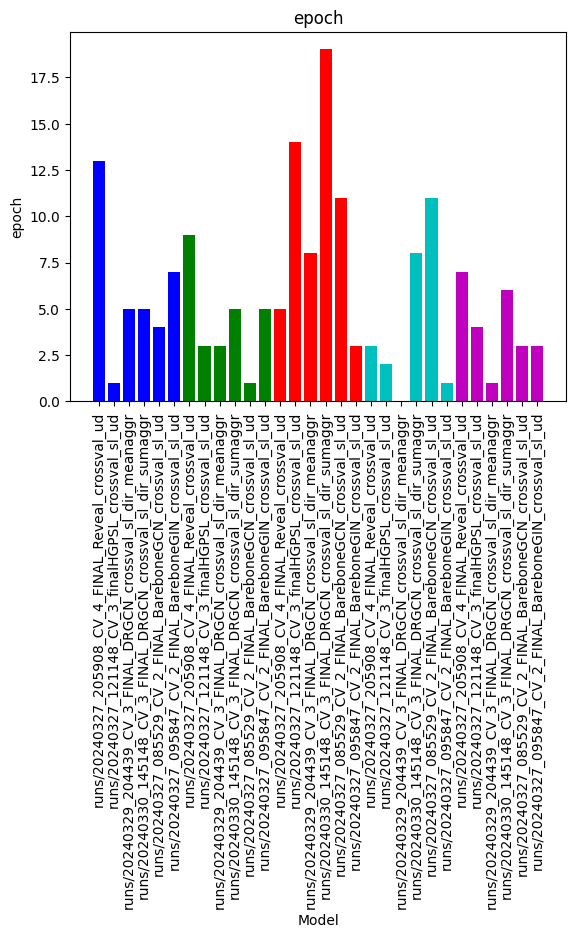

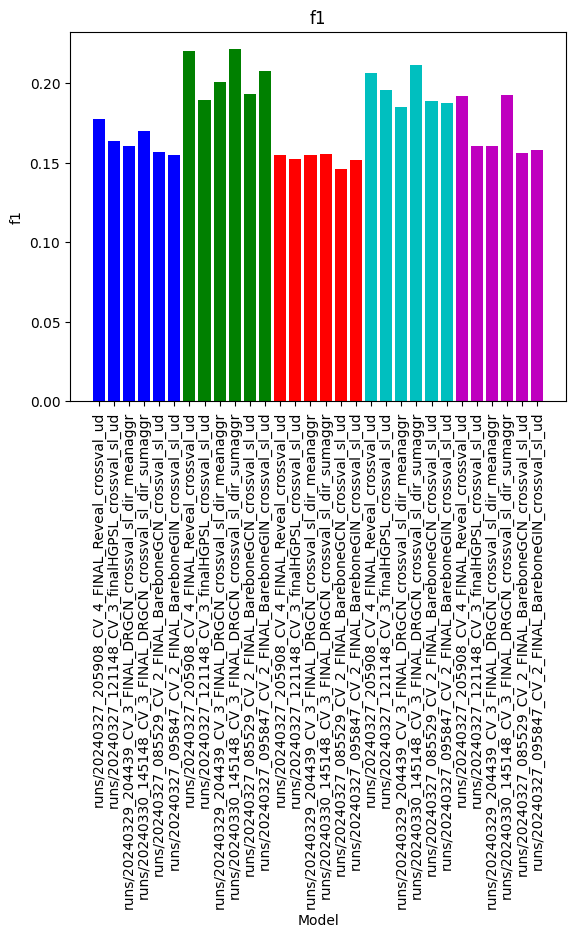

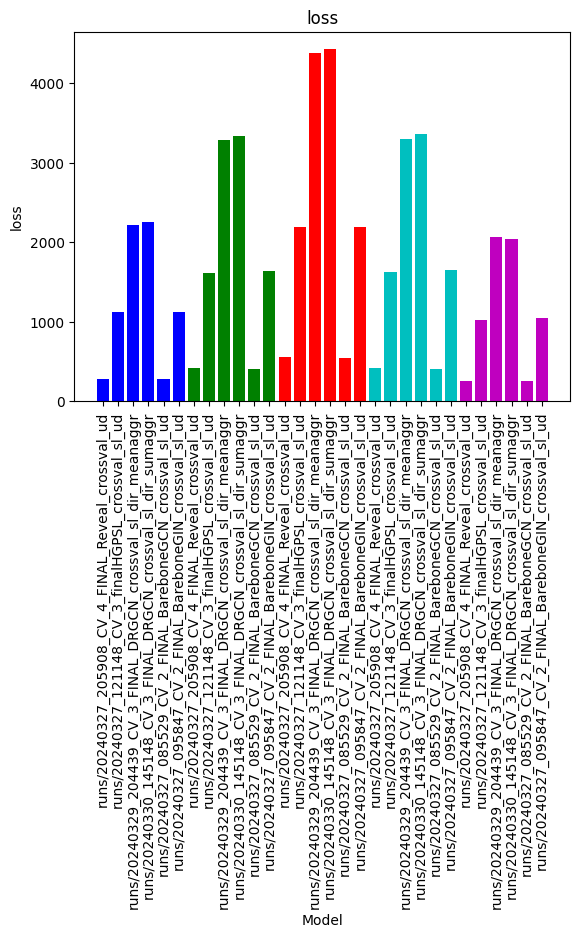

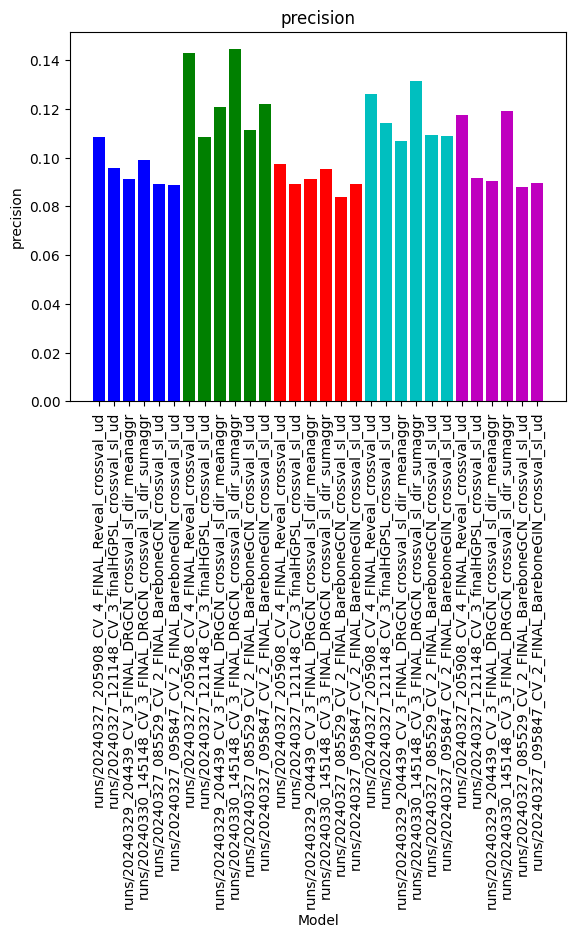

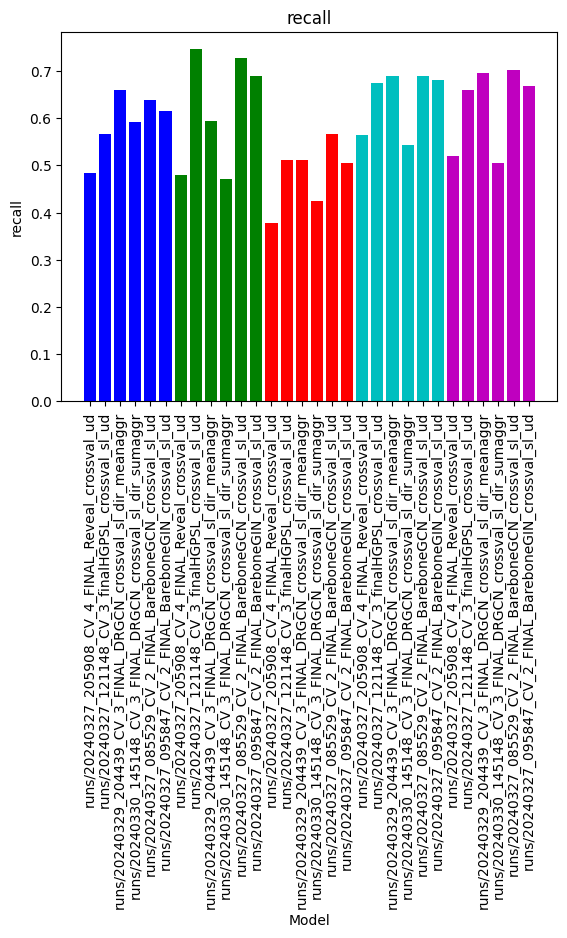

In [4]:
# data looks like:
# {'FN': {'runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud': [813,
#    1434,
#    1804,
#    1130,
#    700],
#   'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud': [682,
#    701,
#    1414,
#    841,
# ... 

import matplotlib.pyplot as plt
# for each metric, plot 5 groups of bar plots, one group for each cv. in one group from each model there is one bar
# plot the bars in one group side by side
for metric, data in new_data.items():
    fig, ax = plt.subplots()
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    
    x_tick_labels = []
    for _ in range(5):
        x_tick_labels+= list(data.keys())
        
    ax.set_xticks(range(len(x_tick_labels)))
    ax.set_xticklabels(x_tick_labels, rotation=90)
    for i, (model, values) in enumerate(data.items()):
        # ax.bar([i + j*len(data) for j in range(5)], values, label=model, )
        # color per fold
        colors = ['b', 'g', 'r', 'c', 'm']
        for j in range(5):
            ax.bar(i + j*len(data), values[j], label=model, color=colors[j])
    # ax.legend()
    plt.show()

In [5]:
values

[0.6150919467343057,
 0.6894049346879536,
 0.504656778199379,
 0.6800463141644153,
 0.6682692307692307]

In [6]:
values

[0.6150919467343057,
 0.6894049346879536,
 0.504656778199379,
 0.6800463141644153,
 0.6682692307692307]

In [7]:
i

5

In [8]:
# {'FN': {'runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud': [813,
#    1434,
#    1804,
#    1130,
#    700],
#   'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud': [682,
#    701,
#    1414,
#    841,
#    495],
# per fold

per_fold = {}
# based on new_data

for metric, data in new_data.items():
    per_fold[metric] = {}
    for model, values in data.items():
        for i, v in enumerate(values):
            if i not in per_fold[metric]:
                per_fold[metric][i] = {}
            if model not in per_fold[metric][i]:
                per_fold[metric][i][model] = []
            per_fold[metric][i][model].append(v)
   

In [9]:
# {'FN': {0: {'runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud': [813],
#    'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud': [682],
#    'runs/20240329_204439_CV_3_FINAL_DRGCN_crossval_sl_dir_meanaggr': [535],
#    'runs/20240330_145148_CV_3_FINAL_DRGCN_crossval_sl_dir_sumaggr': [644],
#    'runs/20240327_085529_CV_2_FINAL_BareboneGCN_crossval_sl_ud': [569],
#    'runs/20240327_095847_CV_2_FINAL_BareboneGIN_crossval_sl_ud': [607]},
#   1: {'runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud': [1434],
#    'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud': [701],

# for each metric for each fold take the max. then take the mean of the maxes, eg above for fn fold 0, max is 813 
# then take the mean of the maxes over all models
maxes = {}
for metric, data in per_fold.items():
    maxes[metric] = {}
    for fold, models in data.items():
        maxes[metric][fold] = 0
        vals = []
        for model, values in models.items():
            vals.append(values[0])
        
        maxes[metric][fold] = max(vals)
    



In [10]:
# {'FN': {0: 813, 1: 1456, 2: 1804, 3: 1182, 4: 720},
#  'FP': {0: 10386, 1: 16919, 2: 17949, 3: 14951, 4: 10598},
#  'TN': {0: 23668, 1: 26627, 2: 49832, 3: 32659, 4: 21593},
#  'TP': {0: 1042, 1: 2055, 2: 1641, 3: 1786, 4: 1021},
#  'balanced_accuracy': {0: 0.6568518906468644,
#   1: 0.6459343028662692,

# now take the mean of the maxes

for metric, data in maxes.items():
    print(metric, sum(data.values())/5)
    

FN 1195.0
FP 14160.6
TN 30875.8
TP 1509.0
balanced_accuracy 0.6543444336510347
epoch 11.8
f1 0.1916837973071755
loss 3088.334781008959
precision 0.12016855262400805
recall 0.6725993583322557


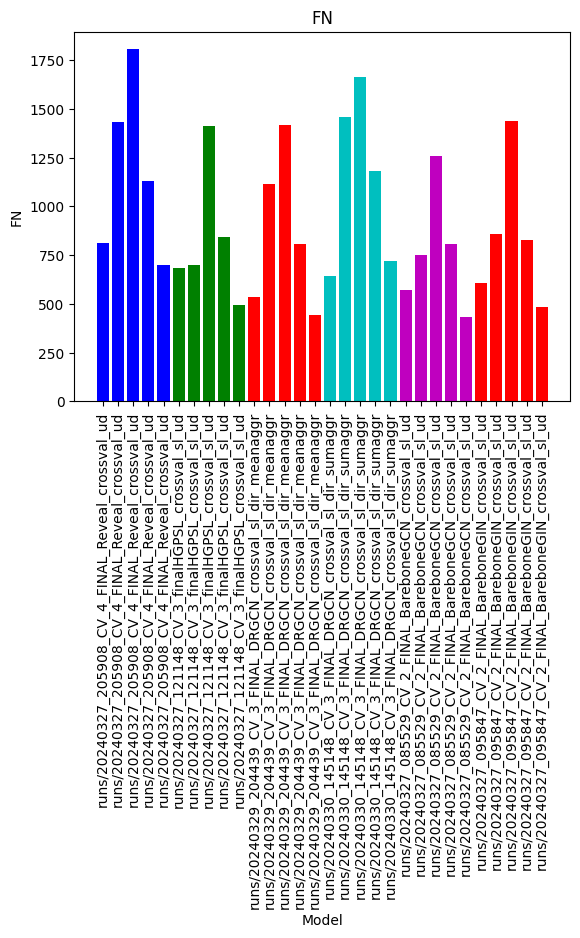

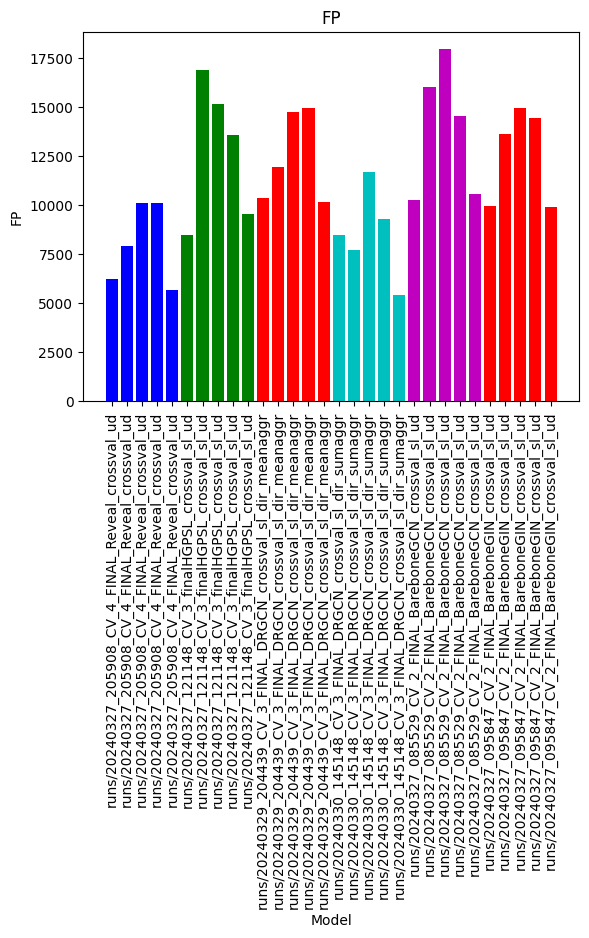

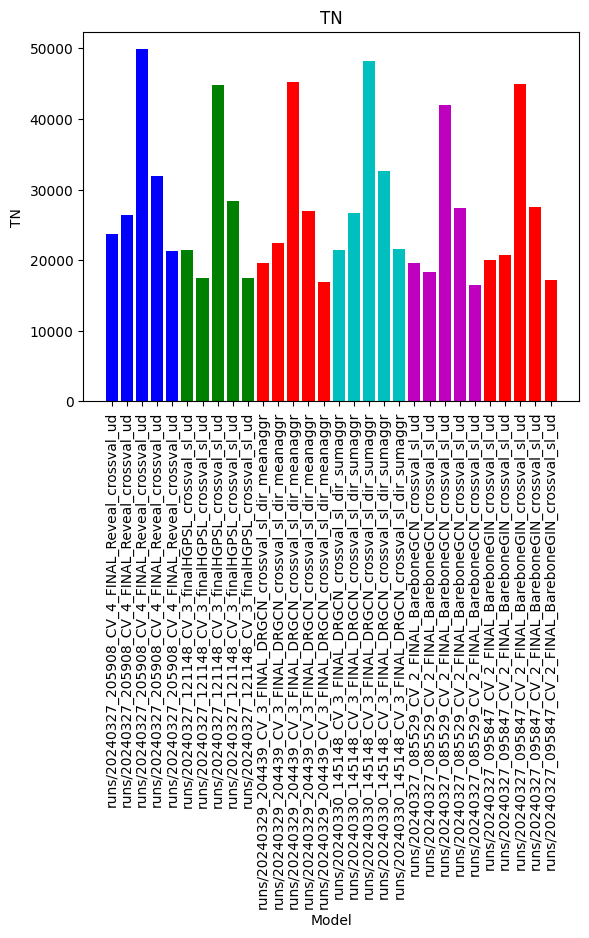

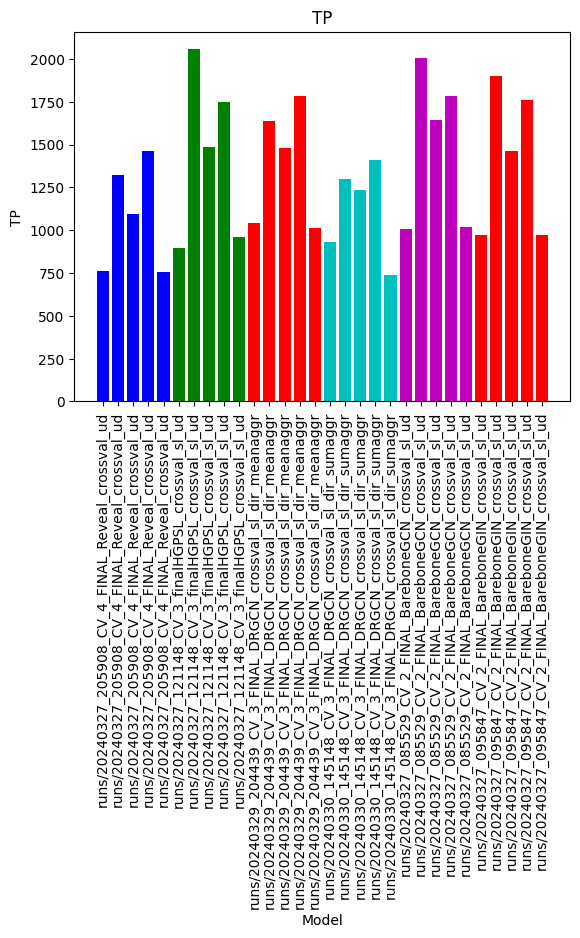

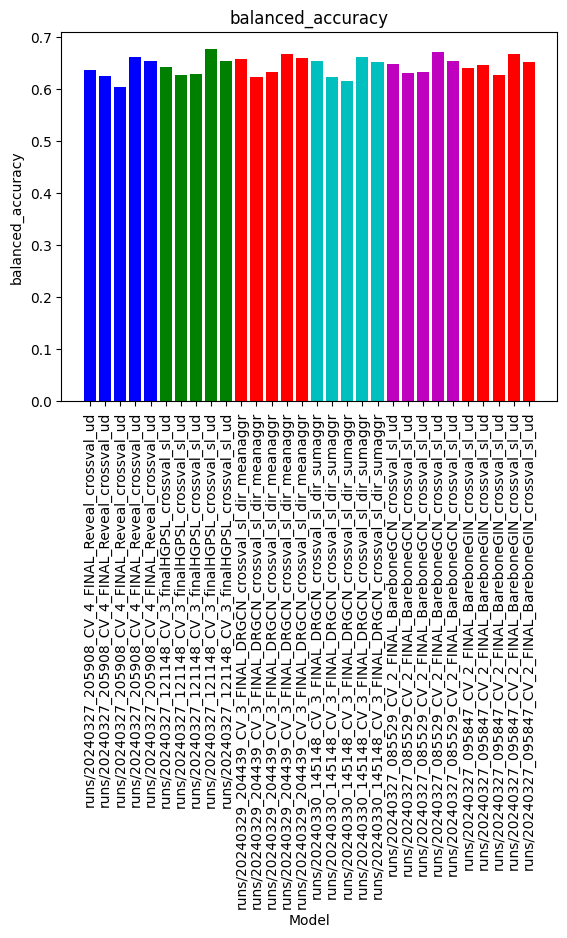

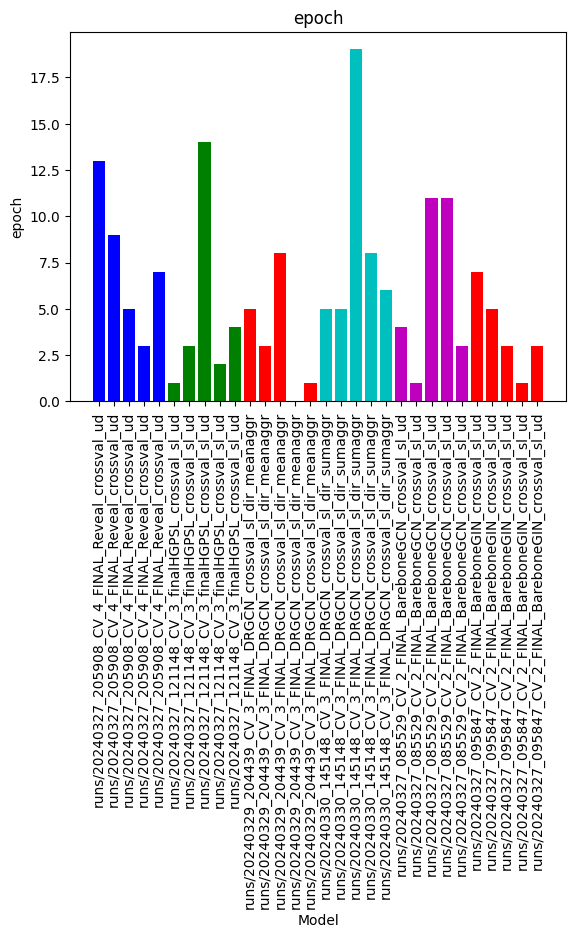

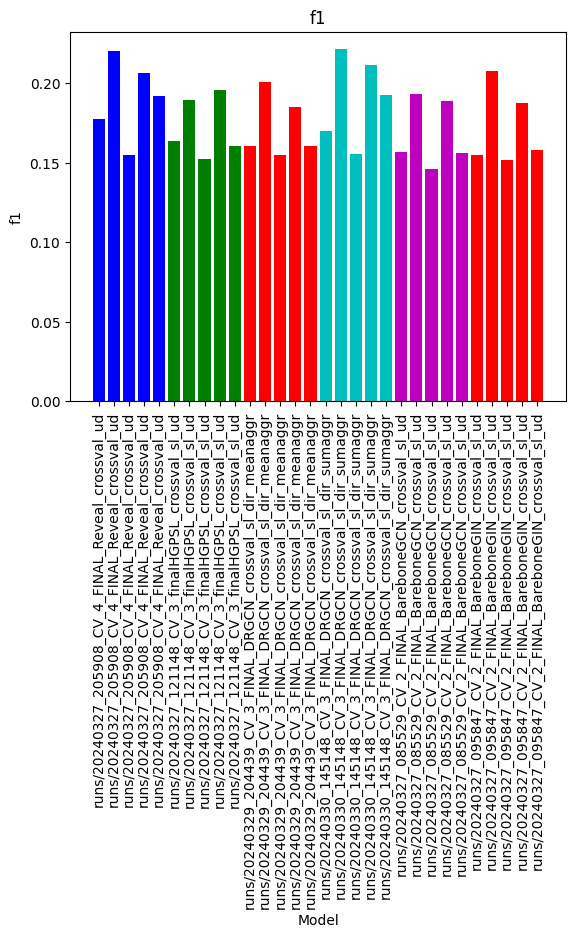

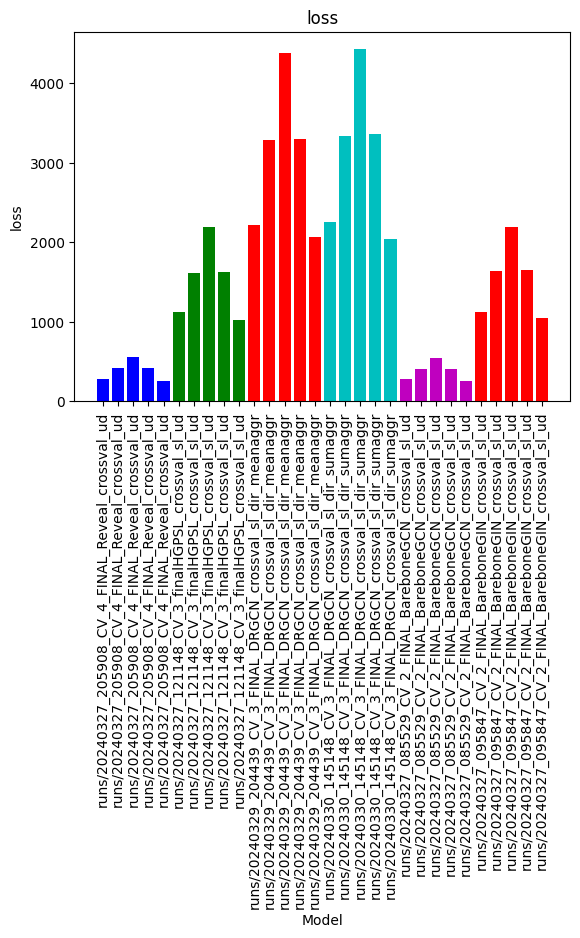

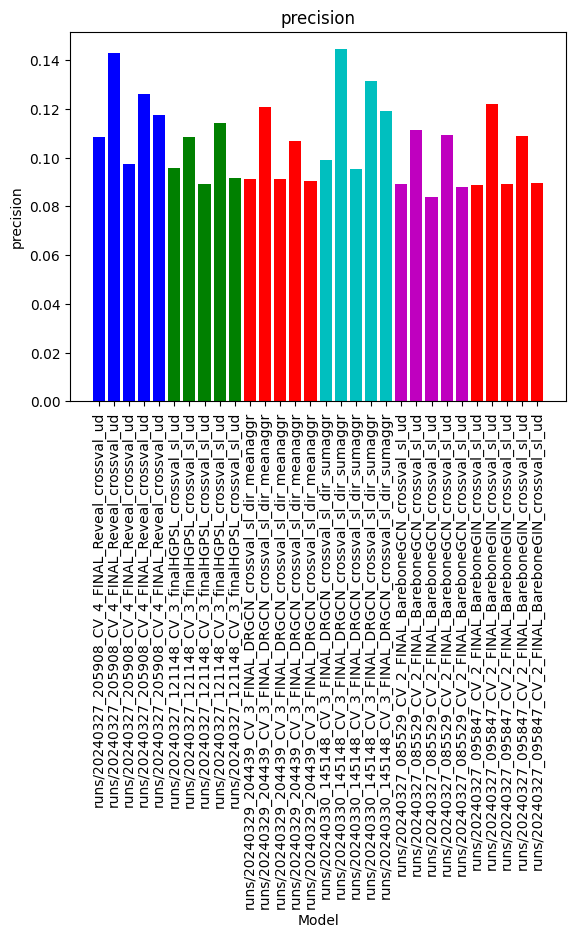

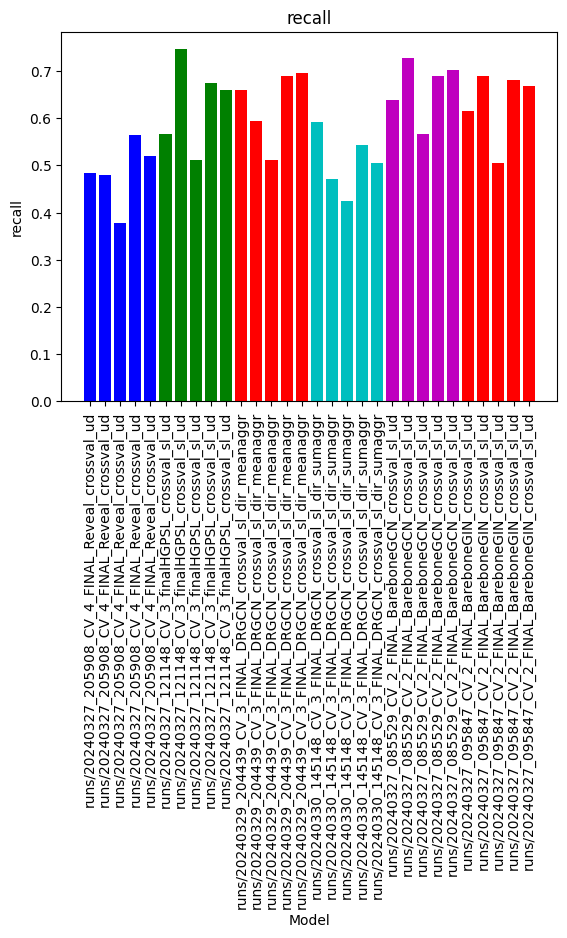

In [11]:
import matplotlib.pyplot as plt
# for each metric, plot 5 groups of bar plots, one group for each cv. in one group from each model there is one bar
# plot the bars in one group side by side
for metric, data in new_data.items():
    fig, ax = plt.subplots()
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    
    x_tick_labels = []
        # x_tick_labels.append() list(data.keys())
    for k in range(len(list(data.keys()))):
        for _ in range(5):
            x_tick_labels.append(list(data.keys())[k])
        
    ax.set_xticks(range(len(x_tick_labels)))
    ax.set_xticklabels(x_tick_labels, rotation=90)
    # for i, (model, values) in enumerate(data.items()):
    #     # ax.bar([i + j*len(data) for j in range(5)], values, label=model, )
    #     # color per fold
    #     colors = ['b', 'g', 'r', 'c', 'm']
    #     for j in range(5):
    #         ax.bar(i + j*len(data), values[j], label=model, color=colors[j])
    # ax.legend()
    for i, (model, values) in enumerate(data.items()):
        colors = ['b', 'g', 'r', 'c', 'm','r']
        for j in range(5):
            ax.bar(i*5 +j, values[j], label=model, color=colors[i])
    plt.show()

In [19]:
models

['runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud',
 'runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud',
 'runs/20240329_204439_CV_3_FINAL_DRGCN_crossval_sl_dir_meanaggr',
 'runs/20240330_145148_CV_3_FINAL_DRGCN_crossval_sl_dir_sumaggr',
 'runs/20240327_085529_CV_2_FINAL_BareboneGCN_crossval_sl_ud',
 'runs/20240327_095847_CV_2_FINAL_BareboneGIN_crossval_sl_ud']

In [20]:
# get std per model
import numpy as np
for metric, d in data.items():
    for model, values in data.items():
        print(model, metric, sum(values)/5, np.std(values))

runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud FN 1176.2 405.31686370048806
runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud FN 826.6 313.6524190883915
runs/20240329_204439_CV_3_FINAL_DRGCN_crossval_sl_dir_meanaggr FN 863.4 362.61086580520447
runs/20240330_145148_CV_3_FINAL_DRGCN_crossval_sl_dir_sumaggr FN 1133.4 399.8607757707675
runs/20240327_085529_CV_2_FINAL_BareboneGCN_crossval_sl_ud FN 763.6 280.0539947938612
runs/20240327_095847_CV_2_FINAL_BareboneGIN_crossval_sl_ud FN 842.2 327.81299547150354
runs/20240327_205908_CV_4_FINAL_Reveal_crossval_ud FP 8023.4 1863.8760259201792
runs/20240327_121148_CV_3_finalHGPSL_crossval_sl_ud FP 12731.8 3238.797826354711
runs/20240329_204439_CV_3_FINAL_DRGCN_crossval_sl_dir_meanaggr FP 12439.0 2060.5493442283782
runs/20240330_145148_CV_3_FINAL_DRGCN_crossval_sl_dir_sumaggr FP 8537.4 2047.965878622005
runs/20240327_085529_CV_2_FINAL_BareboneGCN_crossval_sl_ud FP 13886.0 3012.140567769041
runs/20240327_095847_CV_2_FINAL_BareboneGIN_crossval_sl

metric FN


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


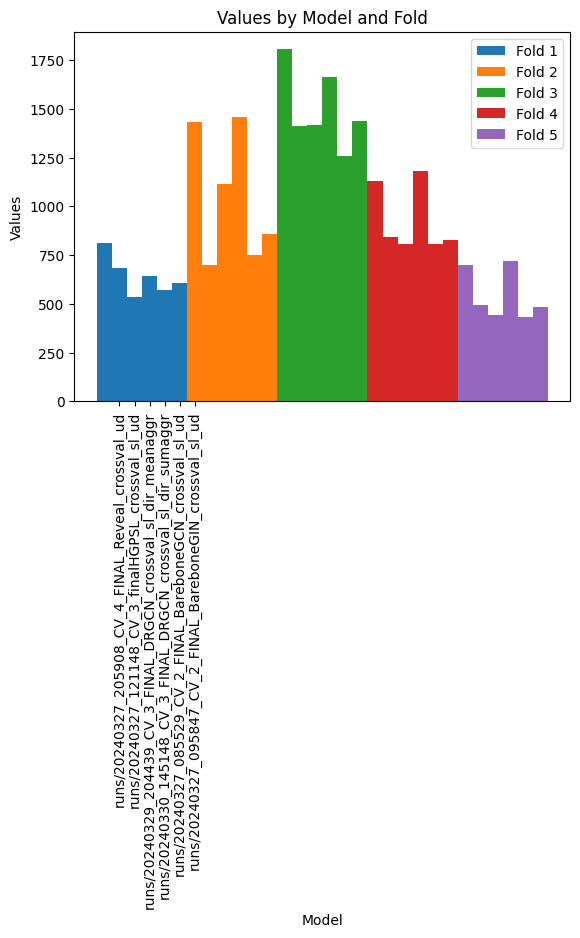

metric FP


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


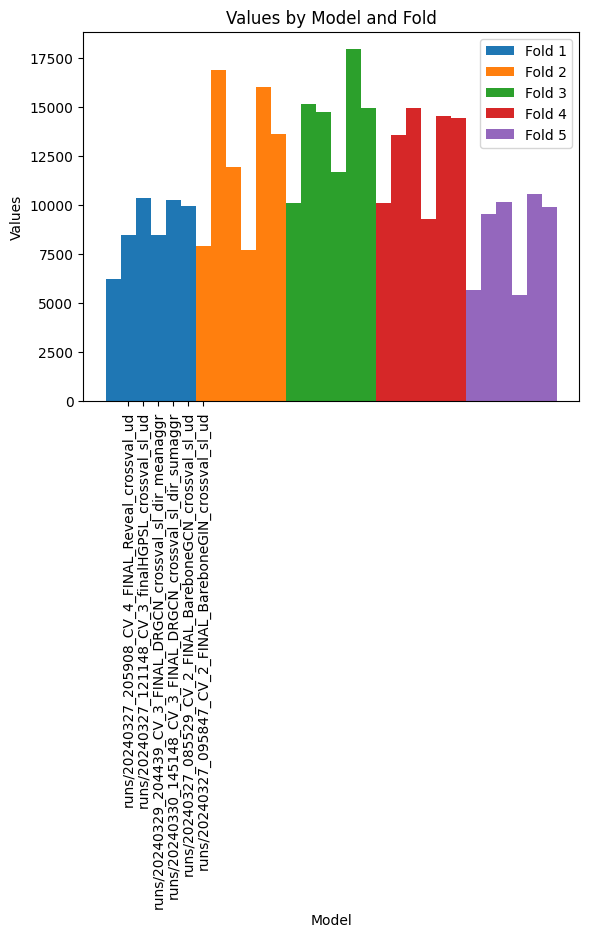

metric TN


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


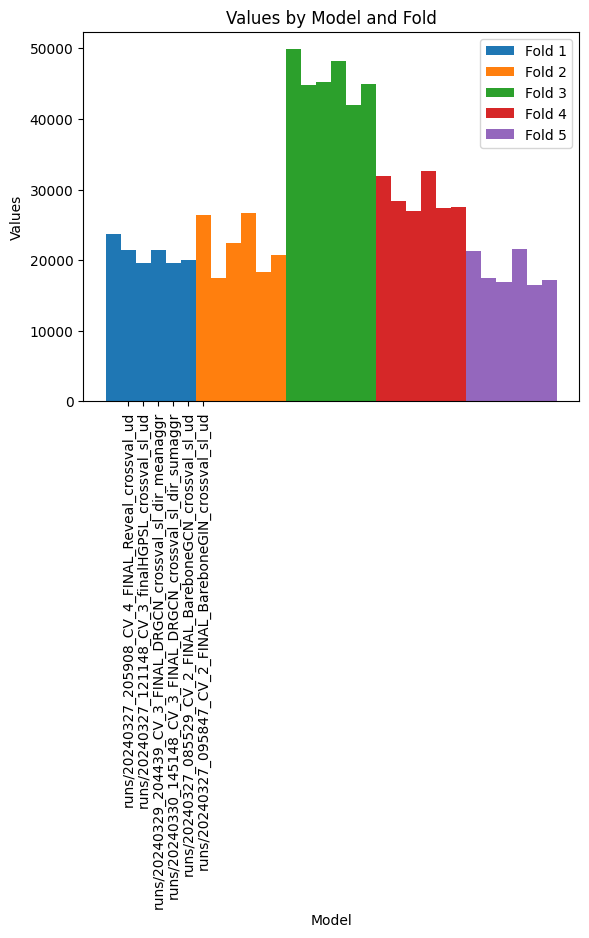

metric TP


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


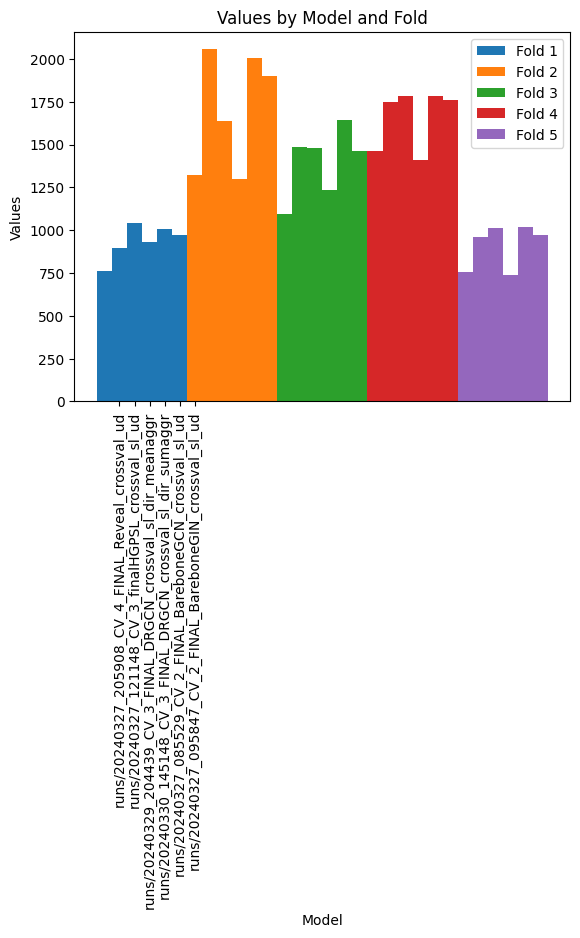

metric balanced_accuracy


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


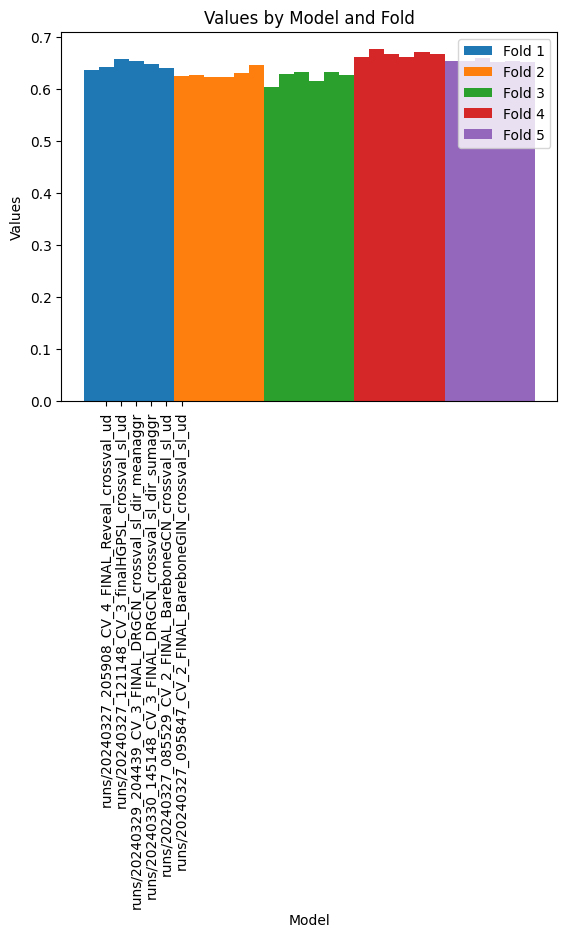

metric epoch


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


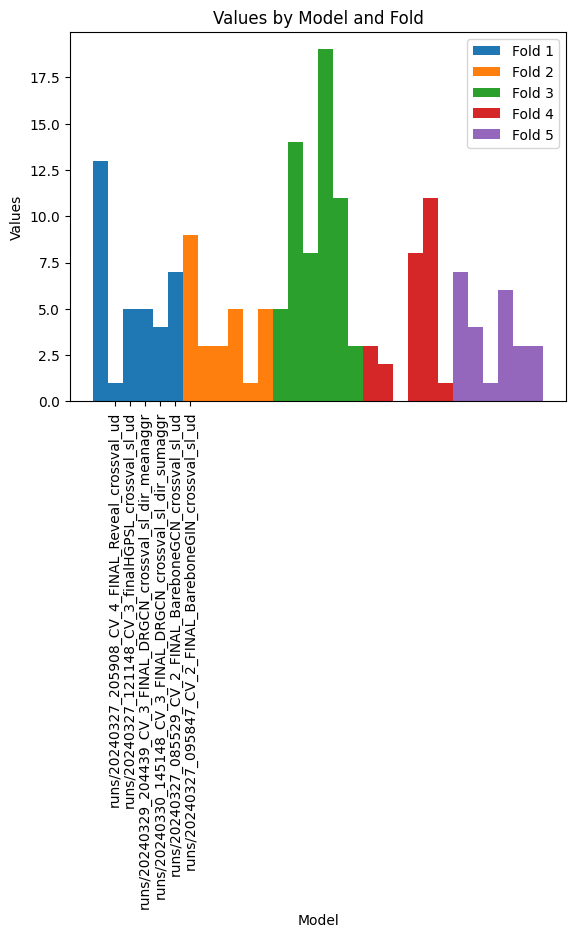

metric f1


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


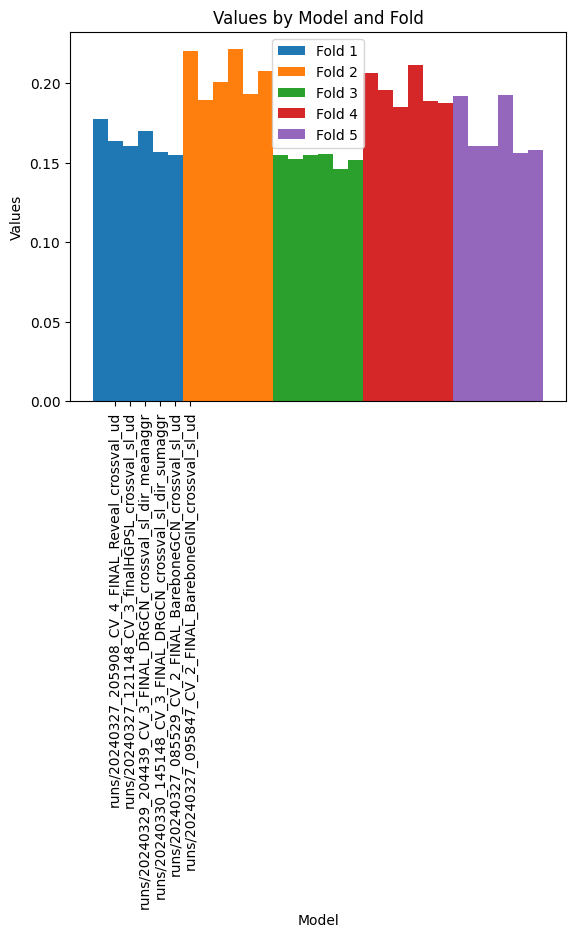

metric loss


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


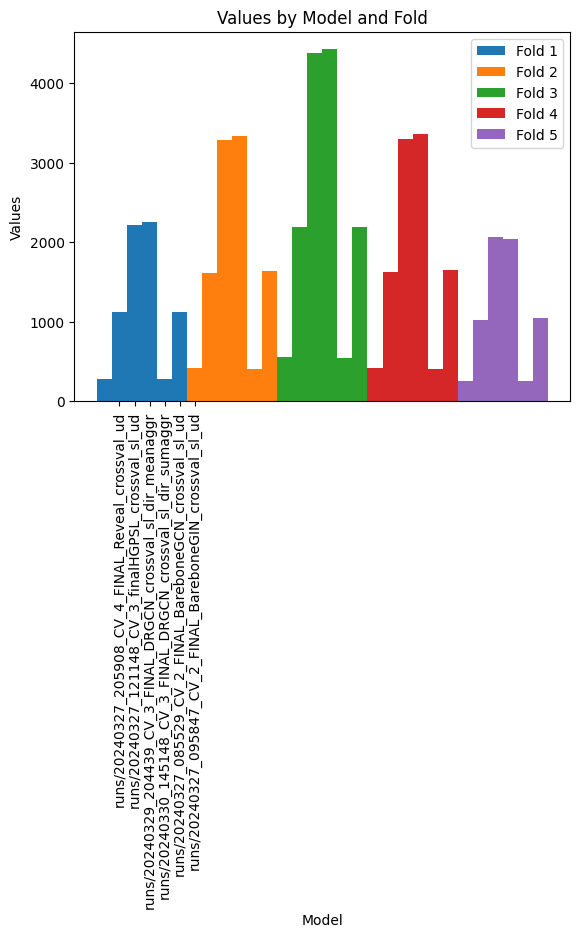

metric precision


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


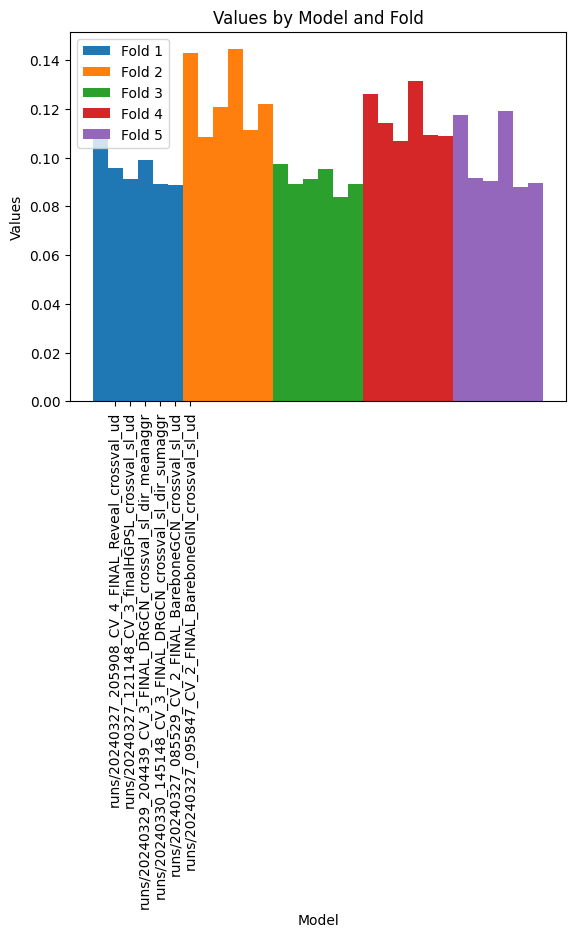

metric recall


/tmp/ipykernel_9286/2652250775.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


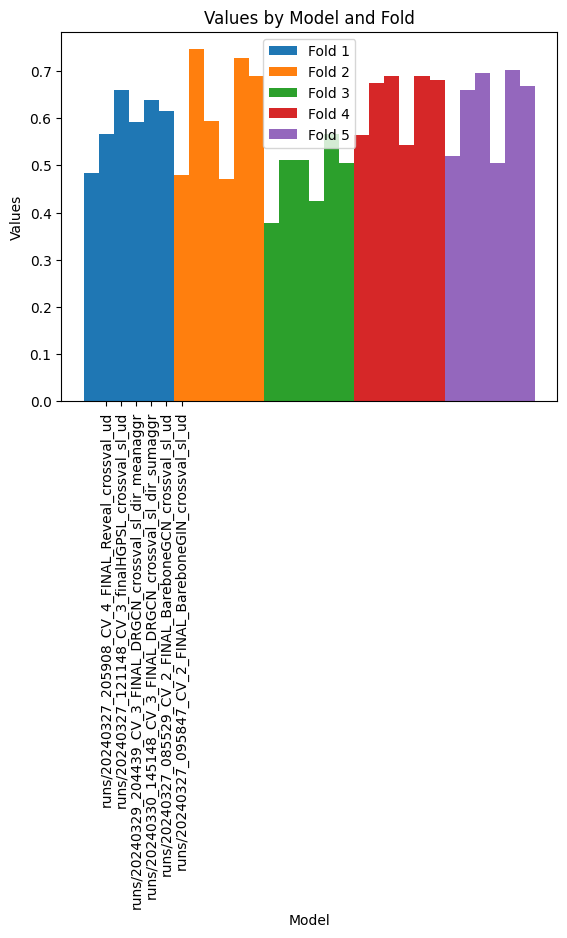

In [24]:
import matplotlib.pyplot as plt
import numpy as np

for metric, data in new_data.items():

    models = list(data.keys())
    folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']
    num_folds = len(folds)
    num_models = len(models)

    # Set the width of each bar
    bar_width = 1
    indices = np.arange(num_models)

    # Create an individual bar for each fold in each model
    for i in range(num_folds):
        values = [data[model][i] for model in models]
        plt.bar(indices + (i)*(bar_width*6), values, bar_width, label=folds[i])

    plt.xlabel('Model')
    plt.ylabel('Values')
    plt.title('Values by Model and Fold')
    print("metric", metric)
    # Add xticks in the middle of the group of bars
    plt.xticks(indices + bar_width, models, rotation='vertical')

    plt.legend()
    plt.tight_layout()
    plt.show()